# DATA 1030 Project - Fall 2024 @ Brown University

Task: Loan Approval Prediction (binary classification)

Link to Kaggle: https://www.kaggle.com/datasets/itshappy/ps4e9-original-data-loan-approval-prediction/data

Link to Github Repository: https://github.com/CQY114/data1030_fall2024_final_project.git

## Exploratory Data Analysis

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [37]:
raw_df = pd.read_csv('data/credit_risk_dataset.csv')
raw_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


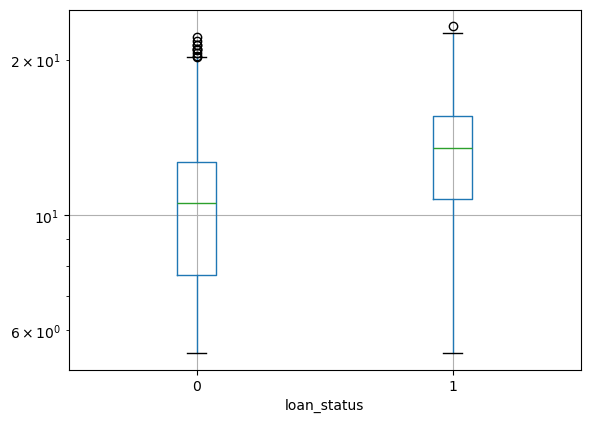

In [60]:
raw_df.boxplot(column='loan_int_rate', by='loan_status')
plt.suptitle('')
plt.title('')
plt.semilogy()
plt.show()

In [20]:
y_true = raw_df['loan_status'].to_numpy()
np.mean(y_true)

0.21816396059052823

In [36]:
raw_X = raw_df.loc[:, raw_df.columns != 'loan_status']
raw_X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [38]:
class_0_mask = y_true==0
class_1_mask = y_true==1
X_class_0 = raw_X.loc[class_0_mask]
X_class_1 = raw_X.loc[class_1_mask]

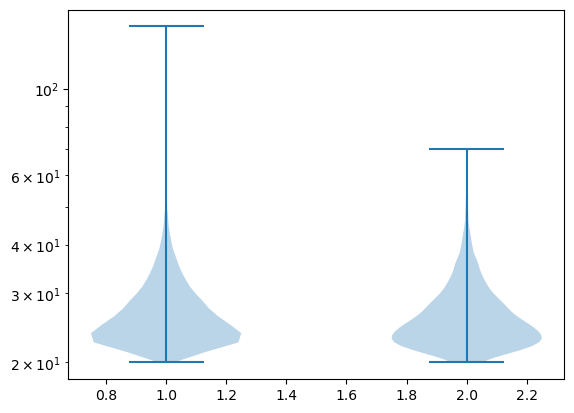

In [62]:
violin_dset = [X_class_0['person_age'], X_class_1['person_age']]
plt.violinplot(dataset=violin_dset)
plt.semilogy()
plt.show()

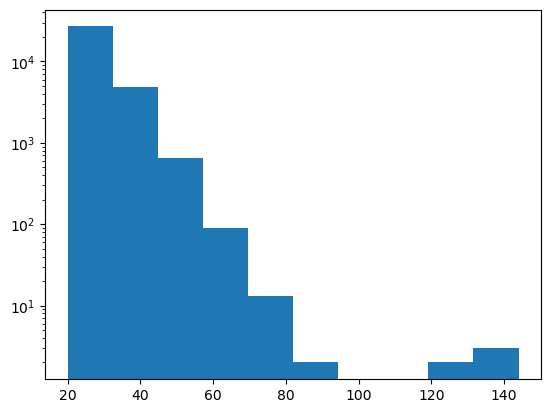

In [3]:
# person_age (continuous)
plt.hist(raw_df['person_age'], log=True)
plt.show()

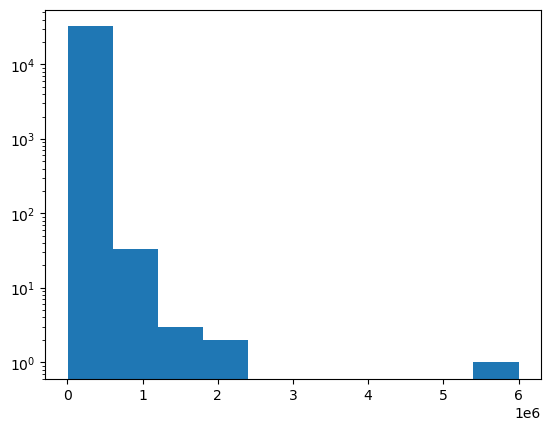

In [4]:
# person_income (continuous)
plt.hist(raw_df['person_income'], log=True)
plt.show()

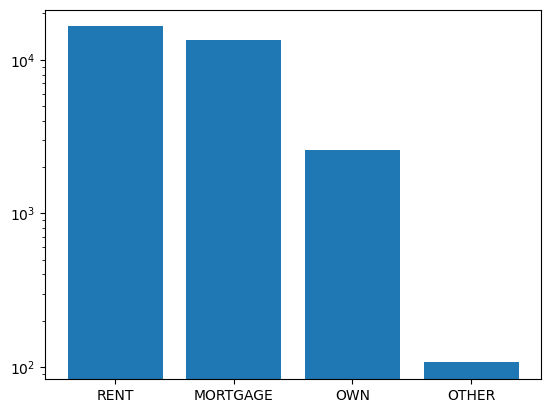

In [5]:
# person_home_ownership (categorical)
count_dict = raw_df['person_home_ownership'].value_counts().to_dict()
plt.bar(count_dict.keys(), count_dict.values())
plt.semilogy()
plt.show()

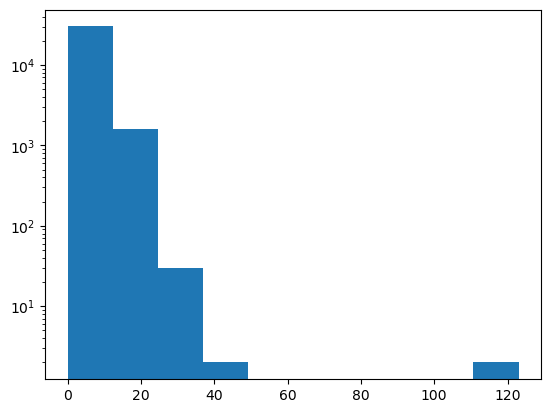

In [6]:
# person_emp_length (continuous)
plt.hist(raw_df['person_emp_length'], log=True)
plt.show()

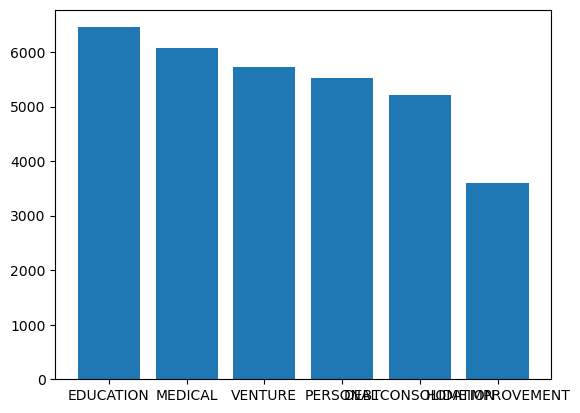

dict_keys(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'])

In [7]:
# loan_intent (categorical)
count_dict = raw_df['loan_intent'].value_counts().to_dict()
plt.bar(count_dict.keys(), count_dict.values())
plt.show()
count_dict.keys()

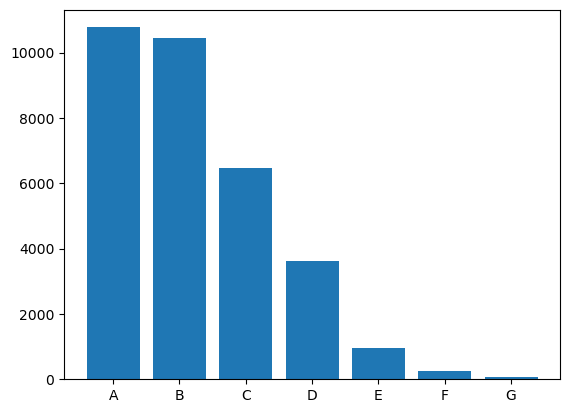

In [8]:
# loan_grade (ordinal)
count_dict = raw_df['loan_grade'].value_counts().to_dict()
plt.bar(count_dict.keys(), count_dict.values())
plt.show()

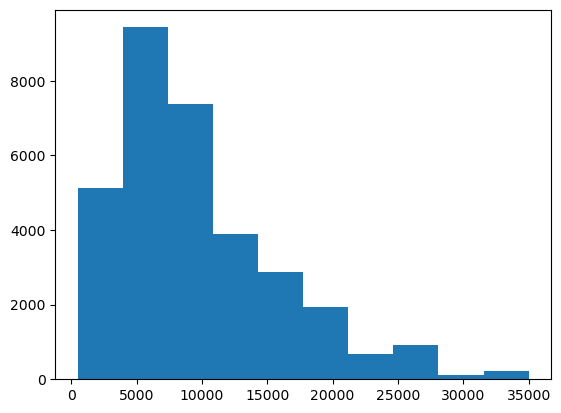

In [9]:
# loan_amnt (continuous)
plt.hist(raw_df['loan_amnt'])
plt.show()

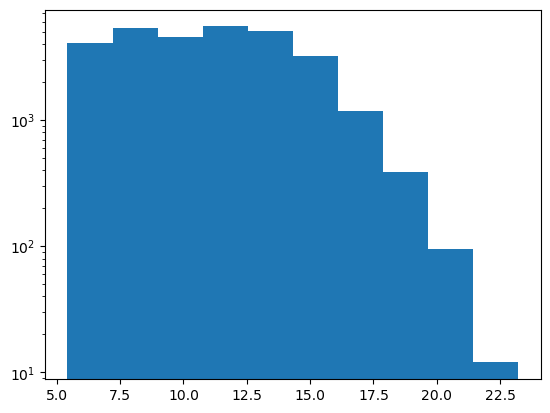

In [10]:
# loan_int_rate (continuous)
plt.hist(raw_df['loan_int_rate'], log=True)
plt.show()

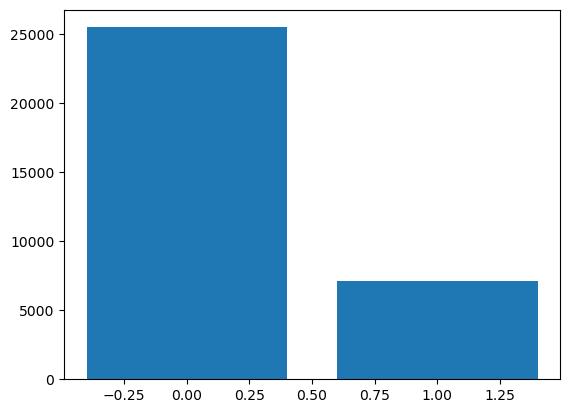

In [11]:
# loan_status (y, binary)
count_dict = raw_df['loan_status'].value_counts().to_dict()
plt.bar(count_dict.keys(), count_dict.values())
plt.show()

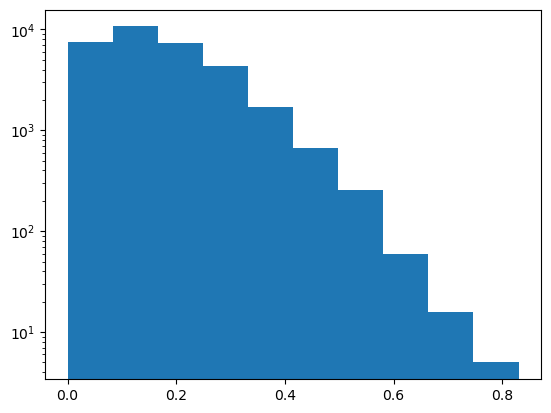

In [12]:
# loan_percent_income (categorical)
plt.hist(raw_df['loan_percent_income'], log=True)
plt.show()

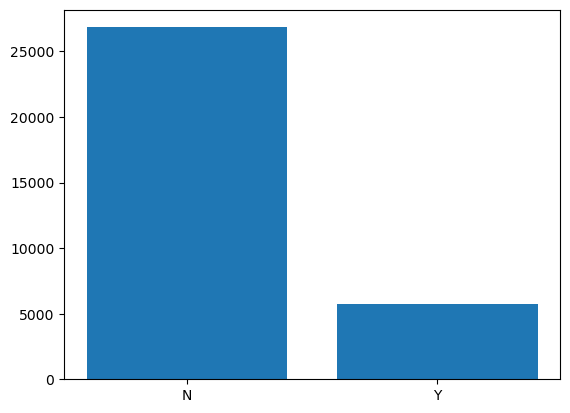

In [13]:
# cb_person_default_on_file (categorical)
count_dict = raw_df['cb_person_default_on_file'].value_counts().to_dict()
plt.bar(count_dict.keys(), count_dict.values())
plt.show()

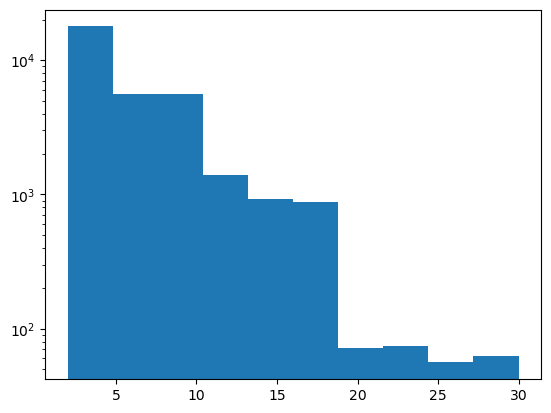

In [14]:
# cb_person_cred_hist_length (continuous)
plt.hist(raw_df['cb_person_cred_hist_length'], log=True)
plt.show()

In [15]:
corr = raw_df.corr()
plt.imshow(corr)
plt.show()

ValueError: could not convert string to float: 'RENT'

## Splitting

In [15]:
# split
y = df['loan_status']
X = df.loc[:, df.columns!='loan_status']
STATE = 42
train_other_splitter = StratifiedShuffleSplit(n_splits=1, train_size=0.9, random_state=STATE)
for train_idx, other_idx in train_other_splitter.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_other, y_other = X.iloc[other_idx], y.iloc[other_idx]
val_test_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=STATE)
for val_idx, test_idx in val_test_splitter.split(X_other, y_other):
    X_val, y_val = X_other.iloc[val_idx], y_other.iloc[val_idx]
    X_test, y_test = X_other.iloc[test_idx], y_other.iloc[test_idx]
data_dict = {
    'X_train': X_train,
    'y_train': y_train,
    'X_val': X_val,
    'y_val': y_val,
    'X_test': X_test,
    'y_test': y_test,
}
print("**** Shapes ****")
for name, data in data_dict.items():
    print(f"{name}: {data.shape}")

**** Shapes ****
X_train: (29322, 11)
y_train: (29322,)
X_val: (1629, 11)
y_val: (1629,)
X_test: (1630, 11)
y_test: (1630,)


In [14]:
# preprocess